In [1]:
#Importação de bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
import missingno as msno 


In [2]:
#Leitura dos dados "Internações Hospitalares no SUS - Ano 2008 - CSV", arquivo com final 01
inter_08_01 =  pd.read_csv("RDAC0801.csv",sep = ",")

#### Análise exploratória

In [3]:
inter_08_01.head()

,UF_ZI,ANO_CMPT,MES_CMPT,ESPEC,CGC_HOSP,N_AIH,IDENT,CEP,MUNIC_RES,NASC,...,CID_ASSO,CID_MORTE,COMPLEX,FINANC,FAEC_TP,REGCT,RACA_COR,ETNIA,SEQUENCIA,REMESSA
0,120000,2008,1,1,4034526001549,1207500003006,1,69960000,120030,19250818,...,NaN,NaN,2,4,21014.0,0,1,NaN,108,HE12000001N200801.DTS
1,120000,2008,1,1,4034526001549,1208100031853,1,69960000,120030,19820715,...,NaN,NaN,2,6,NaN,0,3,NaN,109,HE12000001N200801.DTS
2,120000,2008,1,1,4034526001549,1208100031941,1,69960000,120030,19880302,...,NaN,NaN,2,6,NaN,0,3,NaN,110,HE12000001N200801.DTS
3,120000,2008,1,1,4034526001549,1208100032910,1,69960000,120030,19910319,...,NaN,NaN,2,6,NaN,0,3,NaN,113,HE12000001N200801.DTS
4,120000,2008,1,1,4034526001549,1208100032964,1,69960000,120030,19910204,...,NaN,NaN,2,6,NaN,0,3,NaN,115,HE12000001N200801.DTS


In [4]:
print("Numero de linhas e colunas"  + str(inter_08_01.shape))

Numero de linhas e colunas(2087, 86)


In [5]:
#Lista contendo todas as colunas
inter_08_01.columns

Index(['UF_ZI', 'ANO_CMPT', 'MES_CMPT', 'ESPEC', 'CGC_HOSP', 'N_AIH', 'IDENT',
       'CEP', 'MUNIC_RES', 'NASC', 'SEXO', 'UTI_MES_IN', 'UTI_MES_AN',
       'UTI_MES_AL', 'UTI_MES_TO', 'MARCA_UTI', 'UTI_INT_IN', 'UTI_INT_AN',
       'UTI_INT_AL', 'UTI_INT_TO', 'DIAR_ACOM', 'QT_DIARIAS', 'PROC_SOLIC',
       'PROC_REA', 'VAL_SH', 'VAL_SP', 'VAL_SADT', 'VAL_RN', 'VAL_ACOMP',
       'VAL_ORTP', 'VAL_SANGUE', 'VAL_SADTSR', 'VAL_TRANSP', 'VAL_OBSANG',
       'VAL_PED1AC', 'VAL_TOT', 'VAL_UTI', 'US_TOT', 'DT_INTER', 'DT_SAIDA',
       'DIAG_PRINC', 'DIAG_SECUN', 'COBRANCA', 'NATUREZA', 'GESTAO', 'RUBRICA',
       'IND_VDRL', 'MUNIC_MOV', 'COD_IDADE', 'IDADE', 'DIAS_PERM', 'MORTE',
       'NACIONAL', 'NUM_PROC', 'CAR_INT', 'TOT_PT_SP', 'CPF_AUT', 'HOMONIMO',
       'NUM_FILHOS', 'INSTRU', 'CID_NOTIF', 'CONTRACEP1', 'CONTRACEP2',
       'GESTRISCO', 'INSC_PN', 'SEQ_AIH5', 'CBOR', 'CNAER', 'VINCPREV',
       'GESTOR_COD', 'GESTOR_TP', 'GESTOR_CPF', 'GESTOR_DT', 'CNES',
       'CNPJ_MANT', 'INFE

In [6]:
#Análise dos tipos de entradas
inter_08_01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2087 entries, 0 to 2086
Data columns (total 86 columns):
UF_ZI         2087 non-null int64
ANO_CMPT      2087 non-null int64
MES_CMPT      2087 non-null int64
ESPEC         2087 non-null int64
CGC_HOSP      2087 non-null int64
N_AIH         2087 non-null int64
IDENT         2087 non-null int64
CEP           2087 non-null int64
MUNIC_RES     2087 non-null int64
NASC          2087 non-null int64
SEXO          2087 non-null int64
UTI_MES_IN    2087 non-null int64
UTI_MES_AN    2087 non-null int64
UTI_MES_AL    2087 non-null int64
UTI_MES_TO    2087 non-null int64
MARCA_UTI     2087 non-null int64
UTI_INT_IN    2087 non-null int64
UTI_INT_AN    2087 non-null int64
UTI_INT_AL    2087 non-null int64
UTI_INT_TO    2087 non-null int64
DIAR_ACOM     2087 non-null int64
QT_DIARIAS    2087 non-null int64
PROC_SOLIC    2087 non-null int64
PROC_REA      2087 non-null int64
VAL_SH        2087 non-null float64
VAL_SP        2087 non-null float64
VAL_S

#### Limpeza de dados

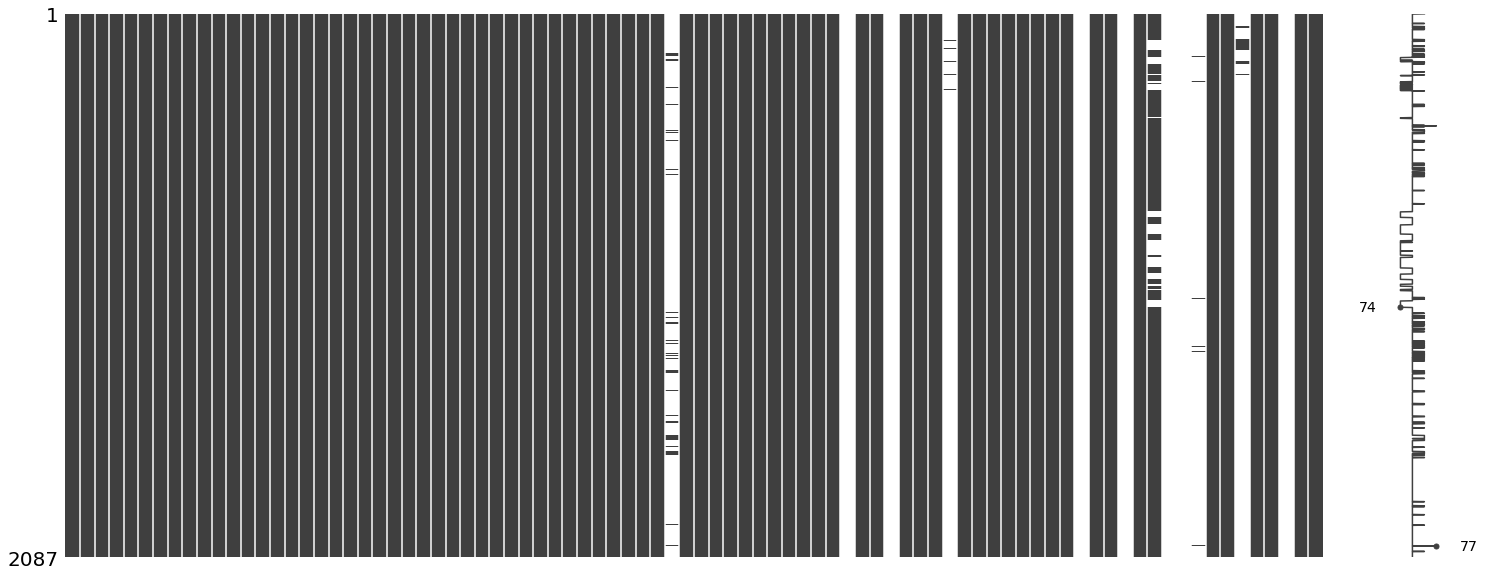

In [7]:
#Verificando valores faltantes (NAN)
msno.matrix(inter_08_01);

Atraves deste gráfico pode-se constatar que algumas colunas podem ser descartadas

##### Rastreando colunas com uma quantidade de NaN maiores que 70% do numero total de linhas

In [8]:
#Gerando lista de colunas a serem excluidas
colunas  = inter_08_01.columns
lista_excluir = []
for coluna in colunas:
    if (pd.isnull(inter_08_01[coluna]).sum()) >= (0.7 * len(inter_08_01.index)):
        lista_excluir.append(coluna)
print(lista_excluir)  

['DIAG_SECUN', 'NUM_PROC', 'CPF_AUT', 'CID_NOTIF', 'GESTOR_COD', 'GESTOR_DT', 'INFEHOSP', 'CID_ASSO', 'CID_MORTE', 'FAEC_TP', 'ETNIA']


In [9]:
#Excluindo as colunas
inter_08_01.drop(lista_excluir,inplace=True,axis=1)

In [10]:
inter_08_01.shape

(2087, 75)

11 linhas foram excluidas

In [16]:
#Verificando dados categóricos
inter_08_01.nunique()

UF_ZI            1
ANO_CMPT         1
MES_CMPT         1
ESPEC            5
CGC_HOSP        17
N_AIH         2087
IDENT            1
CEP             33
MUNIC_RES       29
NASC          1930
SEXO             2
UTI_MES_IN       1
UTI_MES_AN       1
UTI_MES_AL       1
UTI_MES_TO       6
MARCA_UTI        3
UTI_INT_IN       1
UTI_INT_AN       1
UTI_INT_AL       1
UTI_INT_TO       1
DIAR_ACOM       20
QT_DIARIAS      37
PROC_SOLIC     195
PROC_REA       195
VAL_SH         514
VAL_SP         259
VAL_SADT         1
VAL_RN           1
VAL_ACOMP        1
VAL_ORTP         1
              ... 
IND_VDRL         2
MUNIC_MOV       10
COD_IDADE        3
IDADE           94
DIAS_PERM       40
MORTE            2
NACIONAL         3
CAR_INT          4
TOT_PT_SP        1
HOMONIMO         2
NUM_FILHOS       6
INSTRU           3
CONTRACEP1       3
CONTRACEP2       2
GESTRISCO        2
INSC_PN        386
SEQ_AIH5         1
CBOR             1
CNAER            1
VINCPREV         1
GESTOR_TP        1
GESTOR_CPF  

#### Análise exploratória - Raça_Cor

In [11]:
#Porcentangem de internações de Raça_Cor
inter_08_01['RACA_COR'].value_counts(normalize=True)*100

3     77.719214
99    15.860086
1      4.456157
2      1.149976
5      0.766651
4      0.047916
Name: RACA_COR, dtype: float64

Text(0, 0.5, 'Frequência')

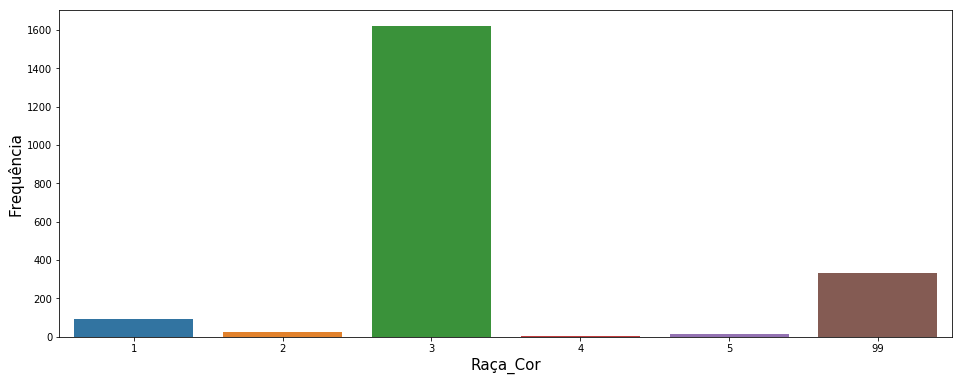

In [12]:
plt.figure(figsize=(16, 6))
sns.countplot(inter_08_01['RACA_COR'])
plt.xlabel("Raça_Cor", fontsize=15)
plt.ylabel("Frequência",fontsize=15)



Grande maioria das pessoas internadas (77%) tem raça_cor do tipo 3

#### Próximos passos

Meu próximo passo seria analisar todos os dados categóricos, para então investigar quais são os principais motivos de internação, quais são as doenças que mais levaram os pacientes a óbito, e talvez montar uma "persona" dos pacientes, talvez através de uma clusterização.

Uma vez tendo feito uma análise satisfatória eu importaria a biblioteca 'Beautiful Soup',  faria um 'web scraping' do datasus, extraindo todos os csvs e mesclando eles, gerando um único dataframe  por ano. Assim com um dataframe mais completo eu atualizaria minha análise já realizada com o novo Dataframe gerado pela web scraping.
